# RFM Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
retail=pd.read_csv("online_retail.csv",sep="," ,encoding="ISO-8859-1",header=0)

In [3]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail.shape

(541909, 8)

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df_null=round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
retail=retail.dropna()
retail.shape

(406829, 8)

In [9]:
retail['CustomerID']=retail['CustomerID'].astype(str)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10948\4036660443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['CustomerID']=retail['CustomerID'].astype(str)


# Adding Monetary

In [10]:
retail['Amount']=retail['Quantity']*retail['UnitPrice']
rfm_m=retail.groupby('CustomerID')['Amount'].sum()
rfm_m=rfm_m.reset_index()
rfm_m.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10948\1033409141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Amount']=retail['Quantity']*retail['UnitPrice']


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Adding Frequency

In [11]:
rfm_f=retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f=rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
rfm=pd.merge(rfm_m,rfm_f,on="CustomerID",how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors='coerce')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10948\1828405791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors='coerce')


In [14]:
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
retail['Diff']=max_date-retail['InvoiceDate']
retail.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10948\976450322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Diff']=max_date-retail['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [16]:
rfm_p=retail.groupby('CustomerID')['Diff'].min()
rfm_p=rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [17]:
rfm_p['Diff']=rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
rfm=pd.merge(rfm,rfm_p, on='CustomerID', how='inner')
rfm.columns=['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<Axes: >

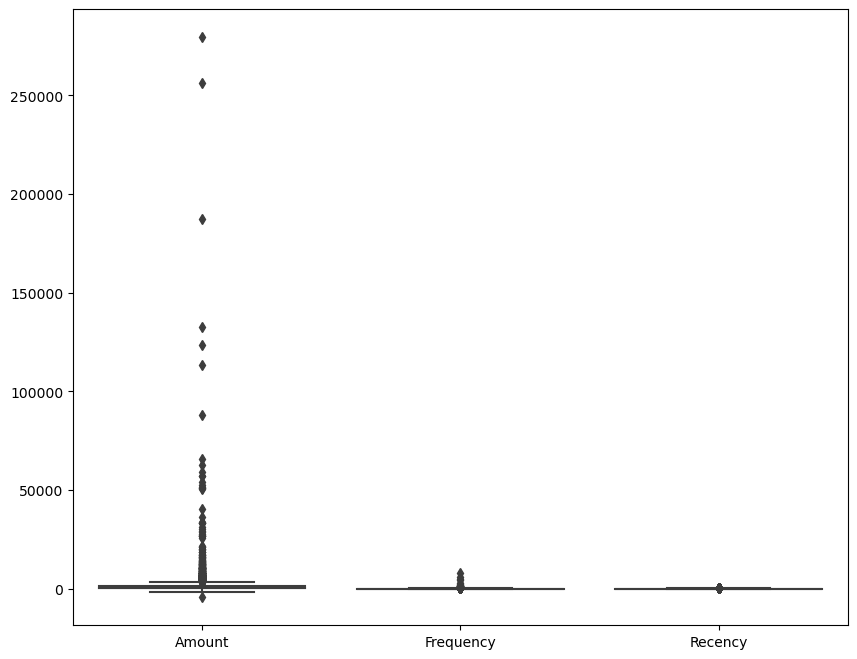

In [19]:
attributes=['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes])





In [20]:
Q1=rfm.Amount.quantile(0.05)
Q3=rfm.Amount.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Amount >=Q1 - 1.5*IQR) & (rfm.Amount <=Q3+1.5*IQR)]



Q1=rfm.Recency.quantile(0.05)
Q3=rfm.Recency.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Recency >=Q1 - 1.5*IQR) & (rfm.Recency <=Q3+1.5*IQR)]



Q1=rfm.Frequency.quantile(0.05)
Q3=rfm.Frequency.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Frequency >=Q1 - 1.5*IQR) & (rfm.Frequency <=Q3+1.5*IQR)]






In [21]:
rfm_df=rfm[['Amount', 'Frequency', 'Recency']]

scaler=StandardScaler()

rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [22]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['Amount', 'Frequency', 'Recency']

# Model Building

In [23]:
kmeans=KMeans(n_clusters=3, max_iter=300)
kmeans.fit(rfm_df_scaled)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
import pickle 

In [25]:
filename='kmeans_model.pkl'

with open ('kmeans_saved_model', 'wb') as file:
    pickle.dump(kmeans, file)
    
    
file.close()

pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))

In [36]:
quantiles = rfm[['Recency', 'Frequency', 'Amount']].quantile(q=[0.25, 0.50, 0.75]).to_dict()


def R_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 1
    elif x <= quantiles['Recency'][0.50]:
        return 2
    elif x <= quantiles['Recency'][0.75]:
        return 3
    else:
        return 4

def F_score(x):
    if x <= quantiles['Frequency'][0.25]:
        return 4
    elif x <= quantiles['Frequency'][0.50]:
        return 3
    elif x <= quantiles['Frequency'][0.75]:
        return 2
    else:
        return 1

def M_score(x):
    if x <= quantiles['Amount'][0.25]:
        return 4
    elif x <= quantiles['Amount'][0.50]:
        return 3
    elif x <= quantiles['Amount'][0.75]:
        return 2
    else:
        return 1


rfm['R_Score'] = rfm['Recency'].apply(R_score)
rfm['F_Score'] = rfm['Frequency'].apply(F_score)
rfm['M_Score'] = rfm['Amount'].apply(M_score)


rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


def categorize_customer(rfm):
    if rfm['R_Score'] == 1 and rfm['F_Score'] == 1 and rfm['M_Score'] == 1:
        return 'Champions'  # Best customers
    elif rfm['R_Score'] == 1 and rfm['F_Score'] <= 2 and rfm['M_Score'] > 1:
        return 'Loyal Customers'
    elif rfm['R_Score'] <= 2 and rfm['F_Score'] == 1 and rfm['M_Score'] <= 3:
        return 'Loyal but Not High-Spending'
    elif rfm['R_Score'] == 1 and rfm['F_Score'] > 1 and rfm['M_Score'] <= 2:
        return 'Potential Loyalists'
    elif rfm['R_Score'] == 1 and rfm['F_Score'] == 4 and rfm['M_Score'] == 4:
        return 'New Customers'
    elif rfm['R_Score'] > 3 and rfm['F_Score'] <= 2 and rfm['M_Score'] <= 2:
        return 'At-Risk Customers'
    elif rfm['R_Score'] == 4 and rfm['F_Score'] == 4 and rfm['M_Score'] == 4:
        return 'Lost Customers'
    elif rfm['R_Score'] == 2 and rfm['F_Score'] > 1 and rfm['M_Score'] <= 3:
        return 'Promising Customers'
    elif rfm['R_Score'] == 3 and rfm['F_Score'] <= 2 and rfm['M_Score'] <= 2:
        return 'Hibernating Customers'


In [37]:
rfm['Customer_Category'] = rfm.apply(categorize_customer, axis=1)

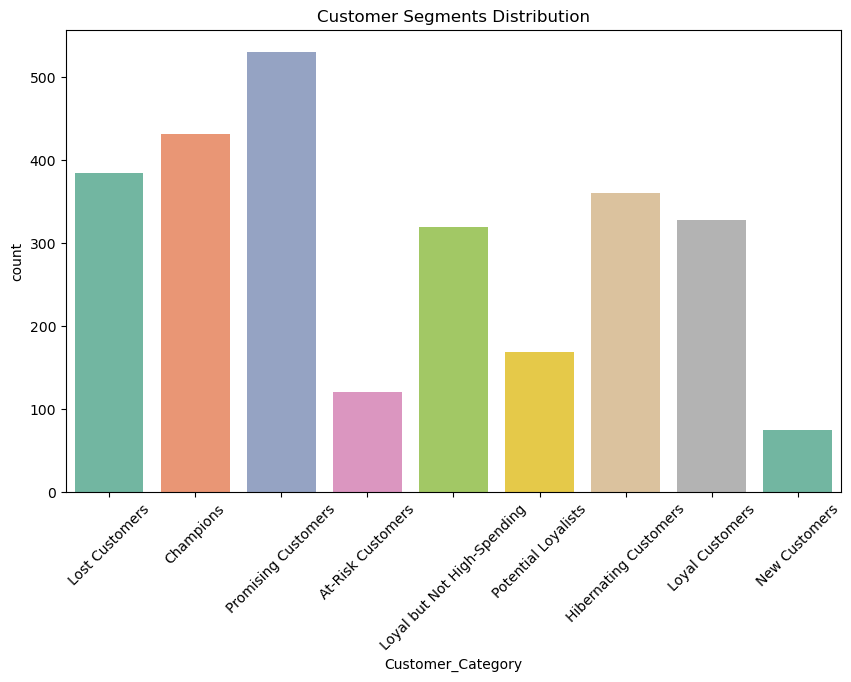

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Category', data=rfm, palette='Set2')
plt.title("Customer Segments Distribution")
plt.xticks(rotation=45)
plt.show()


 ->Champions: Best customers who buy frequently, spend a lot, and purchase recently.

->Loyal High-Spenders: Frequent buyers who spend more than average.

->Loyal but Not High-Spending: Loyal but don’t spend as much.

->Potential Loyalists: New customers with high potential to become loyal.

->At-Risk Customers: Previously good customers who haven’t engaged recently.

->Lost Customers: Customers who used to be active but have stopped purchasing.

->Hibernating Customers: Customers with moderate activity.

->Average Customers: Customers who fall into the middle for RFM scores.

